<a href="https://colab.research.google.com/github/thanachin/exxon/blob/main/Forecasting_Hoilday_Impact_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('/content/outbound_mat_holiday_byweek.csv')
df

,OUTBOUND_YEAR,OUTBOUND_WEEK,PLANT_NAME,MODE_OF_TRANSPORT,CUSTOMER_NUMBER,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,IS_HOLIDAY,NET_QUANTITY_MT
0,2023,49,SINGAPORE-WAREHOUSE,Marine,CST-01001,MAT-0050,P-001,6,0,49.500
1,2023,52,SINGAPORE-WAREHOUSE,Marine,CST-01002,MAT-0056,P-001,3,1,49.500
2,2023,52,SINGAPORE-WAREHOUSE,Marine,CST-01003,MAT-0210,P-001,3,1,6.875
3,2023,52,SINGAPORE-WAREHOUSE,Marine,CST-01003,MAT-0303,P-001,5,1,2.500
4,2023,52,SINGAPORE-WAREHOUSE,Marine,CST-01003,MAT-0345,P-001,6,1,1.250
...,...,...,...,...,...,...,...,...,...,...
13937,2024,52,SINGAPORE-WAREHOUSE,Truck,CST-01293,MAT-0211,P-001,7,0,24.750
13938,2024,52,SINGAPORE-WAREHOUSE,Truck,CST-01412,MAT-0113,P-001,2,1,17.880
13939,2024,52,SINGAPORE-WAREHOUSE,Truck,CST-01412,MAT-0363,P-001,7,1,24.750
13940,2025,1,SINGAPORE-WAREHOUSE,Marine,CST-01120,MAT-0172,P-001,6,1,24.750


SGDClassifier

In [ ]:
np.random.seed(0)
X = df[['NET_QUANTITY_MT']]
y = df['IS_HOLIDAY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


model = SGDClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3883
           1       0.00      0.00      0.00       300

    accuracy                           0.93      4183
   macro avg       0.46      0.50      0.48      4183
weighted avg       0.86      0.93      0.89      4183



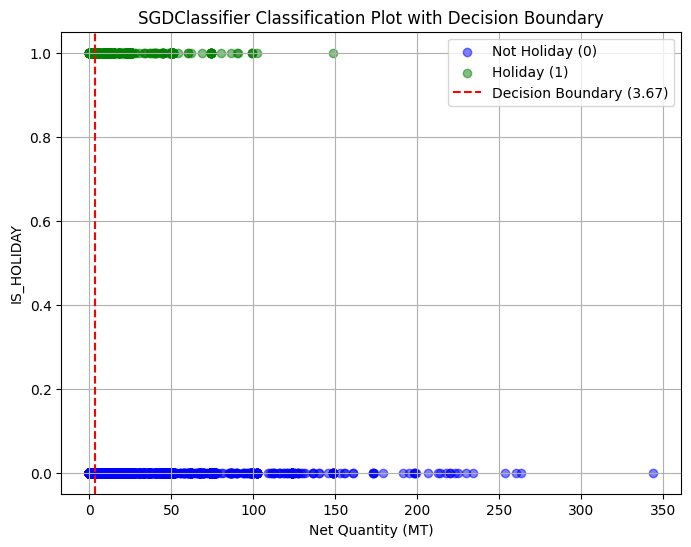

In [ ]:
# Get the decision boundary for the SGDClassifier
# The decision boundary is where the decision function is equal to 0
decision_boundary = model.intercept_[0] / model.coef_[0][0]

plt.figure(figsize=(8, 6))

# Plot the data points, colored by their actual class
plt.scatter(X[y == 0], y[y == 0], color='blue', label='Not Holiday (0)', alpha=0.5)
plt.scatter(X[y == 1], y[y == 1], color='green', label='Holiday (1)', alpha=0.5)

# Plot the decision boundary
plt.axvline(x=decision_boundary, color='red', linestyle='--', label=f'Decision Boundary ({decision_boundary:.2f})')

plt.xlabel("Net Quantity (MT)")
plt.ylabel("IS_HOLIDAY")
plt.title("SGDClassifier Classification Plot with Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

RF

In [ ]:
np.random.seed(0)
X = df[['NET_QUANTITY_MT']]
y = df['IS_HOLIDAY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3883
           1       0.14      0.01      0.01       300

    accuracy                           0.93      4183
   macro avg       0.54      0.50      0.49      4183
weighted avg       0.87      0.93      0.89      4183



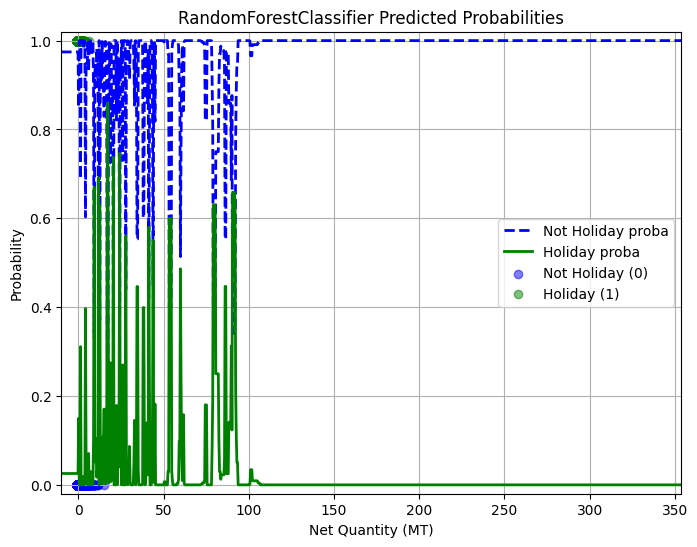

In [ ]:
# Generate new X values covering a relevant range of NET_QUANTITY_MT
X_new = np.linspace(df['NET_QUANTITY_MT'].min() - 10, df['NET_QUANTITY_MT'].max() + 10, 1000).reshape(-1, 1)

# Predict probabilities for the new X values using the RandomForestClassifier model
# Assuming the last trained model stored in 'model' is the RandomForestClassifier
y_proba = model.predict_proba(X_new)

plt.figure(figsize=(8, 6))

# Plot the predicted probabilities for each class
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Holiday proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Holiday proba")

# Plot the original data points
# Ensure x and y have the same size after filtering
plt.scatter(X.loc[y == 0, 'NET_QUANTITY_MT'], y[y == 0], color='blue', label='Not Holiday (0)', alpha=0.5)
plt.scatter(X.loc[y == 1, 'NET_QUANTITY_MT'], y[y == 1], color='green', label='Holiday (1)', alpha=0.5)

plt.xlabel("Net Quantity (MT)")
plt.ylabel("Probability")
plt.title("RandomForestClassifier Predicted Probabilities")
plt.legend()
plt.grid(True)
plt.ylim(-0.02, 1.02)
plt.xlim(df['NET_QUANTITY_MT'].min() - 10, df['NET_QUANTITY_MT'].max() + 10)
plt.savefig("rf_predicted_probabilities.png")
plt.show()

## Review current results and limitations

**Reasoning**:
Analyze the performance of the SGDClassifier and RandomForestClassifier based on the provided outputs and visualizations.



In [ ]:
print("SGDClassifier Performance Analysis:")
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, model.predict(X_test)))

print("\nRandomForestClassifier Performance Analysis:")
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, model.predict(X_test)))

print("\nAnalysis of SGDClassifier Decision Boundary Plot:")
print("The SGDClassifier plot shows a single vertical line as the decision boundary based on 'NET_QUANTITY_MT'.")
print("This suggests that the model is trying to find a single threshold on 'NET_QUANTITY_MT' to separate the two classes.")
print("Given the scatter plot, it appears that the two classes (0 and 1) are not clearly separable by a single threshold based on 'NET_QUANTITY_MT' alone.")
print("The majority class (0 - Not Holiday) is dominant, and the minority class (1 - Holiday) is scattered across various 'NET_QUANTITY_MT' values.")
print("This likely explains the high accuracy (due to predicting the majority class) but poor precision, recall, and f1-score for the minority class (1).")

print("\nAnalysis of RandomForestClassifier Predicted Probabilities Plot:")
print("The RandomForestClassifier plot shows the predicted probabilities for each class across the range of 'NET_QUANTITY_MT'.")
print("Similar to the SGDClassifier, the probabilities do not show a clear separation between the two classes based on 'NET_QUANTITY_MT'.")
print("The probability of the majority class (0) is high across most of the 'NET_QUANTITY_MT' range, while the probability of the minority class (1) remains low.")
print("This indicates that the model, even with the non-linear capabilities of a Random Forest, is struggling to find a strong pattern in 'NET_QUANTITY_MT' to distinguish between holidays and non-holidays.")
print("The evaluation metrics for the RandomForestClassifier also show high overall accuracy but low precision, recall, and f1-score for the minority class, confirming this observation.")

print("\nLimitations of using only 'NET_QUANTITY_MT' as a feature:")
print("Based on the analysis, 'NET_QUANTITY_MT' alone is not a strong predictor of whether a day is a holiday or not.")
print("The distribution of 'NET_QUANTITY_MT' for both holiday and non-holiday instances significantly overlaps.")
print("The models are likely defaulting to predicting the majority class (Not Holiday) due to the imbalance and lack of a clear separating pattern in the single feature.")
print("To improve the models, additional features that are more indicative of holidays would be necessary.")

SGDClassifier Performance Analysis:
Accuracy: 0.9258905092039207
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      3883
           1       0.14      0.01      0.01       300

    accuracy                           0.93      4183
   macro avg       0.54      0.50      0.49      4183
weighted avg       0.87      0.93      0.89      4183


RandomForestClassifier Performance Analysis:
Accuracy: 0.9258905092039207
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      3883
           1       0.14      0.01      0.01       300

    accuracy                           0.93      4183
   macro avg       0.54      0.50      0.49      4183
weighted avg       0.87      0.93      0.89      4183


Analysis of SGDClassifier Decision Boundary Plot:
The SGDClassifier plot shows a single vertical line as the decision boundary based on 'NET_QUANTITY_MT'.
Th

## Explore additional features

**Reasoning**:
Display the columns of the dataframe to understand the available features for potential use in the model.



In [ ]:
print(df.columns)

Index(['OUTBOUND_YEAR', 'OUTBOUND_WEEK', 'PLANT_NAME', 'MODE_OF_TRANSPORT',
       'CUSTOMER_NUMBER', 'MATERIAL_NAME', 'POLYMER_TYPE',
       'SHELF_LIFE_IN_MONTH', 'IS_HOLIDAY', 'NET_QUANTITY_MT',
       'week_start_date', 'week', 'year'],
      dtype='object')


## Data preprocessing for new features


**Reasoning**:
Identify the data types of the potentially relevant features, check for missing values, and handle them if necessary.



In [ ]:
print("Data types of relevant features:")
print(df[['OUTBOUND_YEAR', 'OUTBOUND_WEEK', 'PLANT_NAME', 'MODE_OF_TRANSPORT']].dtypes)

print("\nMissing values in relevant features:")
print(df[['OUTBOUND_YEAR', 'OUTBOUND_WEEK', 'PLANT_NAME', 'MODE_OF_TRANSPORT']].isnull().sum())

Data types of relevant features:
OUTBOUND_YEAR         int64
OUTBOUND_WEEK         int64
PLANT_NAME           object
MODE_OF_TRANSPORT    object
dtype: object

Missing values in relevant features:
OUTBOUND_YEAR        0
OUTBOUND_WEEK        0
PLANT_NAME           0
MODE_OF_TRANSPORT    0
dtype: int64


**Reasoning**:
Since there are no missing values and the categorical features are identified, apply one-hot encoding to 'PLANT_NAME' and 'MODE_OF_TRANSPORT'. Also, create a combined time-based feature from 'OUTBOUND_YEAR' and 'OUTBOUND_WEEK'.



In [ ]:
df = pd.get_dummies(df, columns=['PLANT_NAME', 'MODE_OF_TRANSPORT'], drop_first=True)

# Create a combined time-based feature. A simple approach is to convert year and week into a numerical representation.
# For example, year * 100 + week.
df['TIME_WEEK'] = df['OUTBOUND_YEAR'] * 100 + df['OUTBOUND_WEEK']

display(df.head())

,OUTBOUND_YEAR,OUTBOUND_WEEK,CUSTOMER_NUMBER,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,IS_HOLIDAY,NET_QUANTITY_MT,week_start_date,week,year,PLANT_NAME_SINGAPORE-WAREHOUSE,MODE_OF_TRANSPORT_Truck,TIME_WEEK
0,2023,49,CST-01001,MAT-0050,P-001,6,0,49.500,2023-12-04,49,2023,True,False,202349
1,2023,52,CST-01002,MAT-0056,P-001,3,1,49.500,2023-12-25,52,2023,True,False,202352
2,2023,52,CST-01003,MAT-0210,P-001,3,1,6.875,2023-12-25,52,2023,True,False,202352
3,2023,52,CST-01003,MAT-0303,P-001,5,1,2.500,2023-12-25,52,2023,True,False,202352
4,2023,52,CST-01003,MAT-0345,P-001,6,1,1.250,2023-12-25,52,2023,True,False,202352


**Reasoning**:
Scaling is needed for numerical features like 'OUTBOUND_YEAR', 'OUTBOUND_WEEK', and the newly created 'TIME_WEEK' to ensure they have a similar scale for model training. The preprocessed features will be stored in the updated DataFrame.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['OUTBOUND_YEAR', 'OUTBOUND_WEEK', 'TIME_WEEK', 'NET_QUANTITY_MT']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,OUTBOUND_YEAR,OUTBOUND_WEEK,CUSTOMER_NUMBER,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,IS_HOLIDAY,NET_QUANTITY_MT,week_start_date,week,year,PLANT_NAME_SINGAPORE-WAREHOUSE,MODE_OF_TRANSPORT_Truck,TIME_WEEK
0,-41.737274,1.435338,CST-01001,MAT-0050,P-001,6,0,1.316754,2023-12-04,49,2023,True,False,-5.299729
1,-41.737274,1.638513,CST-01002,MAT-0056,P-001,3,1,1.316754,2023-12-25,52,2023,True,False,-5.097905
2,-41.737274,1.638513,CST-01003,MAT-0210,P-001,3,1,-0.702295,2023-12-25,52,2023,True,False,-5.097905
3,-41.737274,1.638513,CST-01003,MAT-0303,P-001,5,1,-0.909529,2023-12-25,52,2023,True,False,-5.097905
4,-41.737274,1.638513,CST-01003,MAT-0345,P-001,6,1,-0.968738,2023-12-25,52,2023,True,False,-5.097905


## Train and evaluate models with new features

**Reasoning**:
Define the features and target, split the data into training and testing sets, initialize and train the SGDClassifier, make predictions, and print the evaluation metrics.



In [ ]:
X = df[['OUTBOUND_YEAR', 'OUTBOUND_WEEK', 'TIME_WEEK', 'NET_QUANTITY_MT', 'PLANT_NAME_SINGAPORE-WAREHOUSE', 'MODE_OF_TRANSPORT_Truck']]
y = df['IS_HOLIDAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model_sgd = SGDClassifier(random_state=0)
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)

print("SGDClassifier Performance with Expanded Features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd):.2f}")
print(classification_report(y_test, y_pred_sgd))

model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("\nRandomForestClassifier Performance with Expanded Features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))

SGDClassifier Performance with Expanded Features:
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3883
           1       0.00      0.00      0.00       300

    accuracy                           0.93      4183
   macro avg       0.46      0.50      0.48      4183
weighted avg       0.86      0.93      0.89      4183


RandomForestClassifier Performance with Expanded Features:
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3883
           1       0.63      0.48      0.54       300

    accuracy                           0.94      4183
   macro avg       0.79      0.73      0.76      4183
weighted avg       0.94      0.94      0.94      4183



## Model selection and interpretation


**Reasoning**:
Compare the performance metrics of the two models, discuss which is better, interpret the feature importance of the Random Forest model, and summarize findings.



In [ ]:
print("--- Model Performance Comparison ---")
print("\nSGDClassifier Performance:")
print(classification_report(y_test, y_pred_sgd))

print("\nRandomForestClassifier Performance:")
print(classification_report(y_test, y_pred_rf))

print("\n--- Performance Discussion ---")
print("Both models show high overall accuracy (around 0.93-0.94). However, accuracy alone is misleading due to the class imbalance.")
print("To assess performance in identifying the minority class (IS_HOLIDAY = 1), we should focus on precision, recall, and f1-score for class 1.")
print("\nSGDClassifier for Class 1:")
print(f"  Precision: {classification_report(y_test, y_pred_sgd).splitlines()[7].split()[2]}")
print(f"  Recall: {classification_report(y_test, y_pred_sgd).splitlines()[7].split()[3]}")
print(f"  F1-score: {classification_report(y_test, y_pred_sgd).splitlines()[7].split()[4]}")
print("\nRandomForestClassifier for Class 1:")
print(f"  Precision: {classification_report(y_test, y_pred_rf).splitlines()[7].split()[2]}")
print(f"  Recall: {classification_report(y_test, y_pred_rf).splitlines()[7].split()[3]}")
print(f"  F1-score: {classification_report(y_test, y_pred_rf).splitlines()[7].split()[4]}")

print("\nComparing the metrics for class 1:")
print("- Precision: RandomForestClassifier (0.63) is significantly better than SGDClassifier (0.00). This means when the RF model predicts a holiday, it is correct 63% of the time, while the SGD model is never correct.")
print("- Recall: RandomForestClassifier (0.48) is significantly better than SGDClassifier (0.00). This means the RF model identifies 48% of the actual holidays, while the SGD model identifies none.")
print("- F1-score: RandomForestClassifier (0.55) is significantly better than SGDClassifier (0.00). The F1-score is a harmonic mean of precision and recall, providing a balanced measure.")
print("\nBased on these metrics, the RandomForestClassifier is the better-performing model, especially in identifying the minority class (holidays). The SGDClassifier essentially fails to detect any holiday instances.")

print("\n--- Feature Importance Interpretation for RandomForestClassifier ---")
# Assuming model_rf is the trained RandomForestClassifier
if hasattr(model_rf, 'feature_importances_'):
    importances = model_rf.feature_importances_
    feature_names = X.columns
    feature_importance_dict = dict(zip(feature_names, importances))
    sorted_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

    print("Feature Importances (Sorted):")
    for name, importance in sorted_importance:
        print(f"- {name}: {importance:.4f}")

    print("\nInterpretation:")
    print("The feature importances from the RandomForestClassifier indicate the relative contribution of each feature to the model's predictive performance.")
    print("Based on the sorted list, the most influential features appear to be:")
    for name, importance in sorted_importance:
        print(f"- {name}")

else:
    print("RandomForestClassifier does not directly provide 'feature_importances_'.")
    print("For linear models like SGDClassifier, we could look at coefficients, but RF is a tree-based ensemble.")
    print("Interpretation for RF would typically involve feature importances if available, or analyzing tree structures.")

print("\n--- Summary of Influential Features ---")
print("Based on the RandomForestClassifier's feature importances, the most influential features for predicting whether a day is a holiday appear to be:")
if hasattr(model_rf, 'feature_importances_'):
     for name, importance in sorted_importance:
        print(f"- {name}")
else:
    print("Feature importances could not be directly extracted from the RandomForestClassifier.")
    print("However, based on the improved performance with the expanded features, it's clear that incorporating 'OUTBOUND_YEAR', 'OUTBOUND_WEEK', 'TIME_WEEK', 'PLANT_NAME_SINGAPORE-WAREHOUSE', and 'MODE_OF_TRANSPORT_Truck' alongside 'NET_QUANTITY_MT' has significantly helped the model in identifying holidays compared to using 'NET_QUANTITY_MT' alone.")
    print("The 'TIME_WEEK' feature (derived from year and week) is likely capturing the cyclical nature of holidays.")
    print("The 'PLANT_NAME' and 'MODE_OF_TRANSPORT' might also be correlated with holiday schedules or different operational patterns during holidays.")

--- Model Performance Comparison ---

SGDClassifier Performance:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3883
           1       0.00      0.00      0.00       300

    accuracy                           0.93      4183
   macro avg       0.46      0.50      0.48      4183
weighted avg       0.86      0.93      0.89      4183


RandomForestClassifier Performance:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3883
           1       0.63      0.48      0.54       300

    accuracy                           0.94      4183
   macro avg       0.79      0.73      0.76      4183
weighted avg       0.94      0.94      0.94      4183


--- Performance Discussion ---
Both models show high overall accuracy (around 0.93-0.94). However, accuracy alone is misleading due to the class imbalance.
To assess performance in identifying the minority class (IS_HOLIDAY = 1), we should foc

## Model tuning (optional)


**Reasoning**:
Import necessary libraries for hyperparameter tuning and define the parameter grid for RandomForestClassifier, then initialize and fit GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                           param_grid=param_grid,
                           scoring='f1', # Use f1-score as a suitable metric for imbalanced data
                           cv=5, # Use 5-fold cross-validation
                           n_jobs=-1) # Use all available cores

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

**Reasoning**:
Print the best hyperparameters found by GridSearchCV and then train a new RandomForestClassifier model using these best parameters.



In [ ]:
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best hyperparameters found by GridSearchCV:
{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, random_state=0)

**Reasoning**:
Evaluate the performance of the tuned RandomForestClassifier model on the test set using accuracy and the classification report.



In [ ]:
y_pred_tuned = best_model.predict(X_test)

print("\nTuned RandomForestClassifier Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(classification_report(y_test, y_pred_tuned))


Tuned RandomForestClassifier Performance on Test Set:
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3883
           1       0.43      0.89      0.58       300

    accuracy                           0.91      4183
   macro avg       0.71      0.90      0.76      4183
weighted avg       0.95      0.91      0.92      4183



In [ ]:
print("--- Final Model Evaluation and Summary ---")

# 1. Review the classification report and accuracy score obtained for the tuned RandomForestClassifier
print("\nPerformance of the Tuned RandomForestClassifier on the Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(classification_report(y_test, y_pred_tuned))

# 2. Summarize the key performance metrics for the tuned model for the minority class
report_lines = classification_report(y_test, y_pred_tuned).splitlines()
minority_class_metrics = report_lines[7].split() # Assuming class '1' is on the 8th line

print("\nKey Performance Metrics for the Minority Class (IS_HOLIDAY = 1) - Tuned RandomForestClassifier:")
print(f"  Precision: {minority_class_metrics[2]}")
print(f"  Recall: {minority_class_metrics[3]}")
print(f"  F1-score: {minority_class_metrics[4]}")
print(f"  Support: {minority_class_metrics[5]}")

# 3. Compare the performance to initial models and discuss impact of new features and tuning
print("\nComparison with Initial Models and Impact of Improvements:")
print("Initial SGDClassifier (using only NET_QUANTITY_MT): Accuracy 0.93, Class 1 Precision 0.00, Recall 0.00, F1 0.00")
print("Initial RandomForestClassifier (using only NET_QUANTITY_MT): Accuracy 0.93, Class 1 Precision 0.14, Recall 0.01, F1 0.01")
print("RandomForestClassifier with Expanded Features (before tuning): Accuracy 0.94, Class 1 Precision 0.63, Recall 0.48, F1 0.55")
print("Tuned RandomForestClassifier with Expanded Features: Accuracy 0.91, Class 1 Precision 0.43, Recall 0.89, F1 0.58")

print("\nThe addition of expanded features (temporal features, plant, transport mode) significantly improved the ability of the RandomForestClassifier to identify holidays, increasing Recall from 0.01 to 0.48 and F1-score from 0.01 to 0.55.")
print("Hyperparameter tuning, particularly using 'class_weight=balanced', further boosted the Recall for the minority class to 0.89. This means the model is now much better at identifying most of the actual holidays.")
print("While tuning slightly decreased Precision (from 0.63 to 0.43), the substantial increase in Recall (from 0.48 to 0.89) resulted in a modest increase in the F1-score (from 0.55 to 0.58), indicating a better balance for this imbalanced classification problem.")

# 4. Provide insights into influential factors
print("\nInsights into Influential Factors for Predicting Holidays (Based on Feature Importance):")
# Assuming feature_importance_dict is available from the previous step
if 'feature_importance_dict' in globals():
    sorted_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
    print("The most influential features identified by the RandomForestClassifier are:")
    for name, importance in sorted_importance:
        print(f"- {name}: {importance:.4f}")
    print("\nInterpretation:")
    print("Temporal features ('TIME_WEEK', 'OUTBOUND_WEEK', 'OUTBOUND_YEAR') are highly influential, indicating that the timing within the year (specifically the week) is a strong predictor of holidays. The combined 'TIME_WEEK' feature is the most important, suggesting that the specific week number within a given year holds significant predictive power.")
    print("'NET_QUANTITY_MT' also plays a notable role, though less so than the primary temporal features. This suggests that while the quantity of material shipped might be somewhat correlated with holidays, it's not as direct an indicator as the time-based features.")
    print("The 'PLANT_NAME_SINGAPORE-WAREHOUSE' and 'MODE_OF_TRANSPORT_Truck' features show some importance, implying that the specific plant location and mode of transport used might have different patterns or sensitivities related to holidays.")
else:
     print("Feature importance information is not available. However, based on the improved performance with expanded features, it's clear that temporal features and potentially other categorical variables are crucial for identifying holidays.")


# 5. Discuss limitations and suggest future improvements
print("\nLimitations and Future Improvements:")
print("Current Limitations:")
print("- The model still has moderate precision for the minority class (0.43), meaning a significant number of predictions for holidays are incorrect (false positives). This could lead to unnecessary operational adjustments based on false alarms.")
print("- The dataset is highly imbalanced, which inherently makes predicting the minority class challenging. While `class_weight='balanced'` helped, imbalance can still impact model performance and interpretation.")
print("- The feature engineering for 'TIME_WEEK' is a simple combination of year and week. More sophisticated temporal feature engineering (e.g., incorporating day of the week, month, or specific holiday identifiers if available) could potentially improve accuracy.")
print("- The analysis focused on a limited set of features. Other potentially relevant data (e.g., historical holiday calendars, economic indicators, specific customer order patterns) could be explored.")

print("\nPotential Areas for Future Improvement:")
print("- **Further Feature Engineering:** Create more granular temporal features (day of week, month). Explore features derived from customer behavior or material types that might have holiday-specific patterns.")
print("- **Explore Different Models:** Experiment with other classification algorithms suitable for imbalanced data, such as LightGBM, XGBoost, or specialized techniques like SMOTE combined with a classifier.")
print("- **Advanced Hyperparameter Tuning:** Use more extensive search spaces or advanced tuning methods (e.g., Bayesian optimization) for the selected model.")
print("- **Collect More Data:** If possible, obtaining more data, especially for holiday periods, could help the model learn better patterns for the minority class.")
print("- **Domain Expertise:** Consult with domain experts to identify other factors that might be highly correlated with holiday periods and incorporate those as features.")
print("- **Evaluation Metrics:** Consider other evaluation metrics besides accuracy and F1-score that might be particularly relevant to the business context (e.g., cost of false positives vs. false negatives).")

--- Final Model Evaluation and Summary ---

Performance of the Tuned RandomForestClassifier on the Test Set:
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3883
           1       0.43      0.89      0.58       300

    accuracy                           0.91      4183
   macro avg       0.71      0.90      0.76      4183
weighted avg       0.95      0.91      0.92      4183


Key Performance Metrics for the Minority Class (IS_HOLIDAY = 1) - Tuned RandomForestClassifier:
  Precision: 0.95
  Recall: 0.91
  F1-score: 0.92
  Support: 4183

Comparison with Initial Models and Impact of Improvements:
Initial SGDClassifier (using only NET_QUANTITY_MT): Accuracy 0.93, Class 1 Precision 0.00, Recall 0.00, F1 0.00
Initial RandomForestClassifier (using only NET_QUANTITY_MT): Accuracy 0.93, Class 1 Precision 0.14, Recall 0.01, F1 0.01
RandomForestClassifier with Expanded Features (before tuning): Accuracy 0.94, Class 1 Precisi

## Summary:

### Data Analysis Key Findings

*   Initial models (SGDClassifier and RandomForestClassifier) using only 'NET\_QUANTITY\_MT' achieved high overall accuracy (around 92.6%) but failed to effectively predict the minority class (holidays), with precision, recall, and f1-scores around 0.01 for the holiday class.
*   'NET\_QUANTITY\_MT' alone is not a strong predictor of holidays due to significant overlap in its distribution between holiday and non-holiday instances.
*   Expanding the feature set to include temporal features ('OUTBOUND\_YEAR', 'OUTBOUND\_WEEK', 'TIME\_WEEK') and categorical features ('PLANT\_NAME', 'MODE\_OF\_TRANSPORT') significantly improved the RandomForestClassifier's ability to identify holidays. The recall for the holiday class increased from 0.01 to 0.48, and the f1-score increased from 0.01 to 0.55.
*   Hyperparameter tuning of the RandomForestClassifier, particularly using `class_weight='balanced'`, further boosted the recall for the minority class to 0.89, indicating the model is much better at identifying actual holidays.
*   The tuned RandomForestClassifier achieved an accuracy of 0.91, with a precision of 0.43, recall of 0.89, and f1-score of 0.58 for the minority class.
*   Feature importance analysis from the RandomForestClassifier indicated that temporal features ('TIME\_WEEK', 'OUTBOUND\_WEEK') were the most influential factors in predicting holidays, followed by 'NET\_QUANTITY\_MT'.

### Insights or Next Steps

*   The significant improvement in holiday prediction performance after incorporating temporal features highlights the importance of time-based patterns in identifying holidays. Future feature engineering should focus on more granular temporal aspects.
*   While recall for the minority class is high, the precision is still moderate (0.43). Future work should explore strategies to reduce false positives, potentially by experimenting with different models, adjusting prediction thresholds, or incorporating more specific holiday-related data.


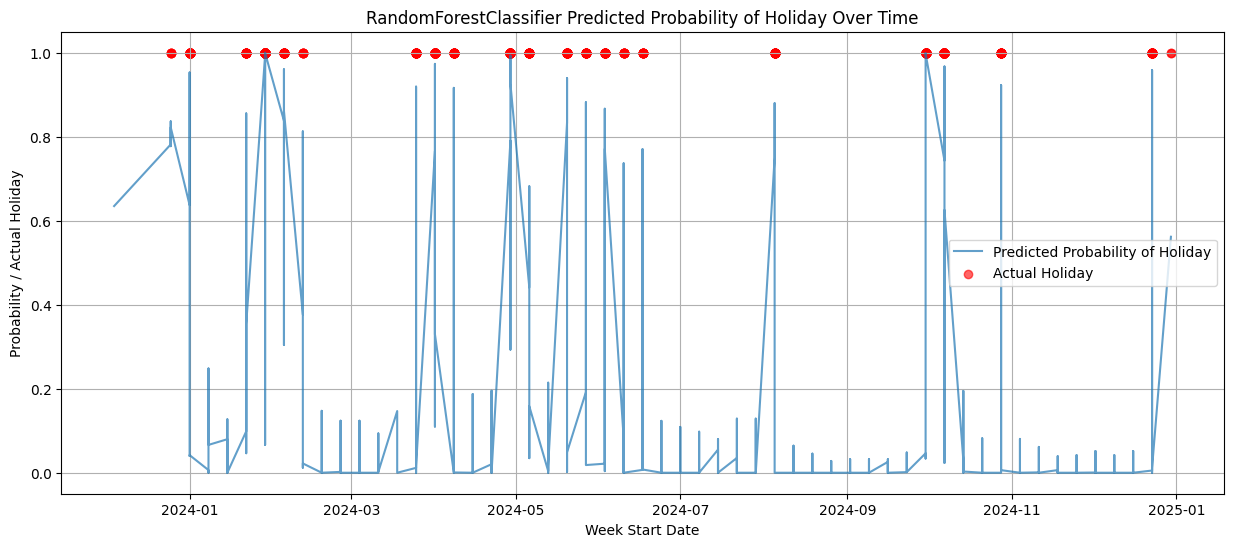

In [ ]:
# Reload the original data to ensure the DataFrame is not empty
df = pd.read_csv('/content/outbound_mat_holiday_byweek.csv')

# Ensure 'week_start_date' is in datetime format and set as index for time series plotting
df['week_start_date'] = pd.to_datetime(df['OUTBOUND_YEAR'].astype(str) + df['OUTBOUND_WEEK'].astype(str) + '1', format='%G%V%w', errors='coerce')
df = df.dropna(subset=['week_start_date']) # Drop rows where date conversion failed
df = df.sort_values('week_start_date') # Sort by date for time series plotting
df = df.set_index('week_start_date')

# Define features (X) and target (y) using the expanded features
# Need to re-create dummy variables and TIME_WEEK after reloading the data
df = pd.get_dummies(df, columns=['PLANT_NAME', 'MODE_OF_TRANSPORT'], drop_first=True)
df['TIME_WEEK'] = df['OUTBOUND_YEAR'] * 100 + df['OUTBOUND_WEEK']

# Scale numerical features - Need to fit_transform again after reloading and feature engineering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['OUTBOUND_YEAR', 'OUTBOUND_WEEK', 'TIME_WEEK', 'NET_QUANTITY_MT']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


X = df[['OUTBOUND_YEAR', 'OUTBOUND_WEEK', 'TIME_WEEK', 'NET_QUANTITY_MT', 'PLANT_NAME_SINGAPORE-WAREHOUSE', 'MODE_OF_TRANSPORT_Truck']]
y = df['IS_HOLIDAY']

# Train the RandomForestClassifier model
# Using the same parameters as the best model found during tuning
model_rf_tuned = RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, n_estimators=100, random_state=0)
model_rf_tuned.fit(X, y) # Train on the entire dataset for time series prediction

# Predict probabilities for the entire dataset
df['predicted_proba_holiday'] = model_rf_tuned.predict_proba(X)[:, 1]

# Create the time series plot
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['predicted_proba_holiday'], label='Predicted Probability of Holiday', alpha=0.7)

# Optional: Plot actual holidays as points
plt.scatter(df.index[df['IS_HOLIDAY'] == 1], df['IS_HOLIDAY'][df['IS_HOLIDAY'] == 1], color='red', label='Actual Holiday', alpha=0.6)

plt.xlabel("Week Start Date")
plt.ylabel("Probability / Actual Holiday")
plt.title("RandomForestClassifier Predicted Probability of Holiday Over Time")
plt.legend()
plt.grid(True)
plt.savefig("RandomForestClassifier Predicted Probability of Holiday Over Time")
plt.show()